[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Ecotrust/DL-Training/blob/main/notebooks/chapter2.ipynb)

Notes from Chapter 2 of the book "Modern computer vision with pytorch" by V. Kishore Ayyadevara and Yeshwanth Reddy (2020).

This notebook was modified from the original version available [here.](https://github.com/PacktPublishing/Modern-Computer-Vision-with-PyTorch/blob/master/Chapter02/Building_a_neural_network_using_PyTorch_on_a_toy_dataset.ipynb)

In [1]:
import torch
import torch.nn as nn
from torch.optim import SGD

# Tensors

In [7]:
# Create a tensor of size 2x4
x = torch.tensor([[1,2,3,4], [5,6,7,8]])
x.shape

torch.Size([2, 4])

In [3]:
# Reshape the tensor
x = x.view(4,2)
x.shape

torch.Size([4, 2])

In [14]:
# Set dim m, infer n
x.view(-1, 2).shape


torch.Size([4, 2])

In [13]:
# Set dim n, infer m
x.view(4, -1).shape

torch.Size([4, 2])

In [4]:
# Squeeze - remove dimensions of size 1
x = torch.randn(10,1,10)
xs = x.squeeze(1)
xu = xs.unsqueeze(1)
print(x.shape, xs.shape, xu.shape)

torch.Size([10, 1, 10]) torch.Size([10, 10]) torch.Size([10, 1, 10])


In [5]:
# Concatenate tensors
x = torch.randn(10,10,10)
z = torch.cat([x,x], axis=0)
print('cat axis 0:', x.shape, z.shape)

cat axis 0: torch.Size([10, 10, 10]) torch.Size([20, 10, 10])


In [6]:
# Get max value.
x = torch.arange(25).reshape(5,5)
print('Max:', x.shape, x.max())

m, argm = x.max(dim=1)
print('Max in axis 1:\n', m, argm)

Max: torch.Size([5, 5]) tensor(24)
Max in axis 1:
 tensor([ 4,  9, 14, 19, 24]) tensor([4, 4, 4, 4, 4])


In [74]:
# Permute dimensions
x = torch.randn(10,20,30)
z = x.permute(2,0,1) # np.permute()
print('Permute dimensions:', x.shape, z.shape)

Permute dimensions: torch.Size([10, 20, 30]) torch.Size([30, 10, 20])


In [67]:
# Matrix multiplication
x = torch.tensor([[1,2,3,4], [5,6,7,8]])
y = torch.tensor([2, 3, 1, 0])
print(
    torch.matmul(x, y), #or
    x @ y
    )

tensor([11, 35]) tensor([11, 35])


In [77]:
# Compute the gradient of a function on a tensor.
x = torch.tensor([[2., -1.], [1., 1.]], requires_grad=True)
out = x.pow(2).sum()
out.backward()
print(x)
print(x.grad)

tensor([[ 2., -1.],
        [ 1.,  1.]], requires_grad=True)
tensor([[ 4., -2.],
        [ 2.,  2.]])


# Build a neural network using PyTorch

In [2]:
# Generate some data.   
x = [[1,2],[3,4],[5,6],[7,8]]
y = [[3],[7],[11],[15]]

# Convert data to tensors.
X = torch.tensor(x).float()
Y = torch.tensor(y).float()

# Register X and Y to the CUDA device.
device = 'cuda' if torch.cuda.is_available() else 'cpu'
X = X.to(device)
Y = Y.to(device)

In [3]:
# Create a class to compose the neural network architecture.
class MyNeuralNet(nn.Module):
    def __init__(self):
        super().__init__()
        # Three-layer network architecture.
        # nn.Linear applies the linear transformation to w_i * x_i + b_i
        self.input_to_hidden_layer = nn.Linear(2,8)
        # nn.ReLU applies the rectified linear unit activation function to the hidden layer.
        self.hidden_layer_activation = nn.ReLU()
        # nn.Linear applies the linear transformation to the activated layer: w_o * x_o + b_o
        self.hidden_to_output_layer = nn.Linear(8,1)
        
    def forward(self, x):
        '''
        Forward propagation of the neural network.

        Parameters
        ----------
        x : torch.Tensor

        Returns 
        -------
        torch.Tensor
        '''
        x = self.input_to_hidden_layer(x)
        x = self.hidden_layer_activation(x)
        x = self.hidden_to_output_layer(x)
        
        return x 

In [4]:
# Initialize the neural network and register it to the CUDA device.
mynet = MyNeuralNet().to(device)

In [5]:
# Access weights and bias.
mynet.input_to_hidden_layer.weight

Parameter containing:
tensor([[ 0.2566,  0.1135],
        [-0.4845, -0.4214],
        [ 0.5874,  0.1528],
        [ 0.3283, -0.0888],
        [ 0.4346,  0.0599],
        [ 0.1190,  0.3589],
        [ 0.4171,  0.0274],
        [-0.3873,  0.6259]], device='cuda:0', requires_grad=True)

In [6]:
# Print all parameters.
list(mynet.parameters())

[Parameter containing:
 tensor([[ 0.2566,  0.1135],
         [-0.4845, -0.4214],
         [ 0.5874,  0.1528],
         [ 0.3283, -0.0888],
         [ 0.4346,  0.0599],
         [ 0.1190,  0.3589],
         [ 0.4171,  0.0274],
         [-0.3873,  0.6259]], device='cuda:0', requires_grad=True),
 Parameter containing:
 tensor([ 0.1424, -0.4524,  0.3043, -0.1884,  0.0985, -0.2625, -0.0328,  0.0841],
        device='cuda:0', requires_grad=True),
 Parameter containing:
 tensor([[ 0.0398,  0.2202, -0.1658,  0.2670, -0.2435,  0.1019, -0.2274,  0.1656]],
        device='cuda:0', requires_grad=True),
 Parameter containing:
 tensor([0.2340], device='cuda:0', requires_grad=True)]

In [7]:
# Initialize the loss function.
loss_func = nn.MSELoss()

# Compute forward pass and loss.
_Y = mynet(X)
loss_value = loss_func(_Y,Y)
print(loss_value)

tensor(114.4128, device='cuda:0', grad_fn=<MseLossBackward0>)


In [8]:
# Implement Stochastic Gradient Descent (SGD) to optimize the loss function with learning rate lr.
opt = SGD(mynet.parameters(), lr = 0.001)

# Minimize loss over 50 epochs.
loss_history = []
for _ in range(50):
    # Reset gradients from optimized tensors to zero.
    opt.zero_grad()
    # Calculate loss.
    loss_value = loss_func(mynet(X),Y)
    # Perform backpropagation.
    loss_value.backward()
    # Update weights.
    opt.step()
    # Record loss.
    loss_history.append(loss_value)

In [9]:
opt.zero_grad()
opt.state

defaultdict(dict,
            {Parameter containing:
             tensor([[ 0.3825,  0.2600],
                     [-0.4845, -0.4214],
                     [ 0.6441,  0.2168],
                     [ 0.5795,  0.2052],
                     [ 0.3617, -0.0273],
                     [ 0.3111,  0.5829],
                     [ 0.3385, -0.0663],
                     [-0.1724,  0.8771]], device='cuda:0', requires_grad=True): {'momentum_buffer': None},
             Parameter containing:
             tensor([ 0.1630, -0.4524,  0.3115, -0.1455,  0.0841, -0.2306, -0.0480,  0.1204],
                    device='cuda:0', requires_grad=True): {'momentum_buffer': None},
             Parameter containing:
             tensor([[ 0.3874,  0.2202,  0.3881,  0.5599,  0.0333,  0.5452, -0.0041,  0.5432]],
                    device='cuda:0', requires_grad=True): {'momentum_buffer': None},
             Parameter containing:
             tensor([0.3567], device='cuda:0', requires_grad=True): {'momentum_buffer': 

Text(0, 0.5, 'loss value')

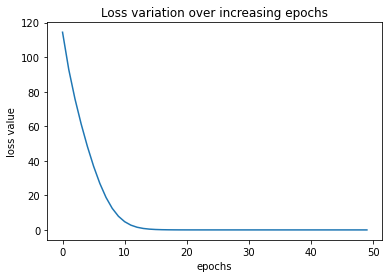

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
# Convert tensor to numpy array before plotting.
plt.plot([x.cpu().data.numpy() for x in loss_history])
plt.title('Loss variation over increasing epochs')
plt.xlabel('epochs')
plt.ylabel('loss value')

In [11]:
# DataLoader and batch size.
from torch.utils.data import Dataset, DataLoader

In [12]:
class MyDataset(Dataset):
    def __init__(self, x, y, device='cuda'):
        self.x = torch.tensor(x).float()
        self.y = torch.tensor(y).float()

        if device == 'cuda':
            self.x = self.x.to(device)
            self.y = self.y.to(device)

    def __len__(self):
        return len(self.x)

    def __getitem__(self, ix):
        return self.x[ix], self.y[ix]

ds = MyDataset(x, y)

In [13]:
dl = DataLoader(ds, batch_size=2, shuffle=True)

In [14]:
mynet = MyNeuralNet().to(device)
loss_func = nn.MSELoss()
from torch.optim import SGD
opt = SGD(mynet.parameters(), lr = 0.001)

In [15]:
# Loop over the dataset dl.
import time

loss_history = []
start = time.time()
for _ in range(50):
    for data in dl:
        x, y = data
        opt.zero_grad()
        loss_value = loss_func(mynet(x),y)
        loss_value.backward()
        opt.step()
        loss_history.append(loss_value)
end = time.time()
print(end - start)

0.10391521453857422


In [16]:
# Predict new data.
val_x = [[10,11]]
val_x = torch.tensor(val_x).float().to(device)

# Pass val_x through the trained neural network.
mynet(val_x)

tensor([[21.0164]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [18]:
# Custom loss function. 

def my_mean_squared_error(_y, y):
    loss = (_y-y)**2
    loss = loss.mean()
    return loss

custom_mse = my_mean_squared_error(mynet(X), Y)
print(custom_mse)

tensor(7.5731e-05, device='cuda:0', grad_fn=<MeanBackward0>)


In [19]:
loss_func = nn.MSELoss()
loss_value = loss_func(mynet(X),Y)
print(loss_value)

tensor(7.5731e-05, device='cuda:0', grad_fn=<MseLossBackward0>)


In [21]:
# Fetching intermediate layers.
input_to_hidden = mynet.input_to_hidden_layer(X)
hiden_activation = mynet.hidden_layer_activation(input_to_hidden)
print(hiden_activation)

tensor([[ 0.0000,  0.0000,  2.5525,  0.0000,  0.0000,  0.4436,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  6.2383,  0.0000,  0.0000,  1.7507,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  9.9241,  0.0000,  0.0000,  3.0578,  0.0000,  0.0000],
        [ 0.0000,  0.0000, 13.6098,  0.0000,  0.0000,  4.3648,  0.0000,  0.0000]],
       device='cuda:0', grad_fn=<ReluBackward0>)


In [22]:
# Using nn.Sequential to compose the neural network architecture.
model = nn.Sequential(
    nn.Linear(2,8),
    nn.ReLU(),
    nn.Linear(8,1)
).to(device)

In [23]:
from torchsummary import summary

summary(model, torch.zeros(1,2))


Layer (type:depth-idx)                   Output Shape              Param #
├─Linear: 1-1                            [-1, 8]                   24
├─ReLU: 1-2                              [-1, 8]                   --
├─Linear: 1-3                            [-1, 1]                   9
Total params: 33
Trainable params: 33
Non-trainable params: 0
Total mult-adds (M): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00


Layer (type:depth-idx)                   Output Shape              Param #
├─Linear: 1-1                            [-1, 8]                   24
├─ReLU: 1-2                              [-1, 8]                   --
├─Linear: 1-3                            [-1, 1]                   9
Total params: 33
Trainable params: 33
Non-trainable params: 0
Total mult-adds (M): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00

In [25]:
val = [[8,9],[10,11],[1.5,2.5]]
model(torch.tensor(val).float().to(device))


tensor([[-2.1286],
        [-2.8093],
        [-0.0622]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [26]:
# Save pytorch model.
torch.save(model.state_dict(), 'mymodel.pth')

# Load pytorch model.
model = nn.Sequential(
    nn.Linear(2, 8),
    nn.ReLU(),
    nn.Linear(8, 1)
).to(device)

state_dict = torch.load('mymodel.pth')
model.load_state_dict(state_dict)
model.to(device)
model(torch.tensor(val).float().to(device))

tensor([[-2.1286],
        [-2.8093],
        [-0.0622]], device='cuda:0', grad_fn=<AddmmBackward0>)